# A behavioural analog to BCI training : results

Statistics and simple plots of the results of the experiment (technical test). 

This notebook does not figure much computational modeling (yet).


Let's start by importing the necessary packages as well as the data : 

 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(200, 3)


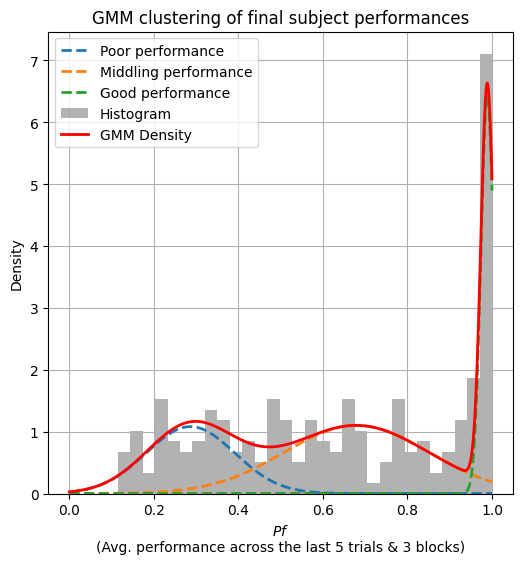

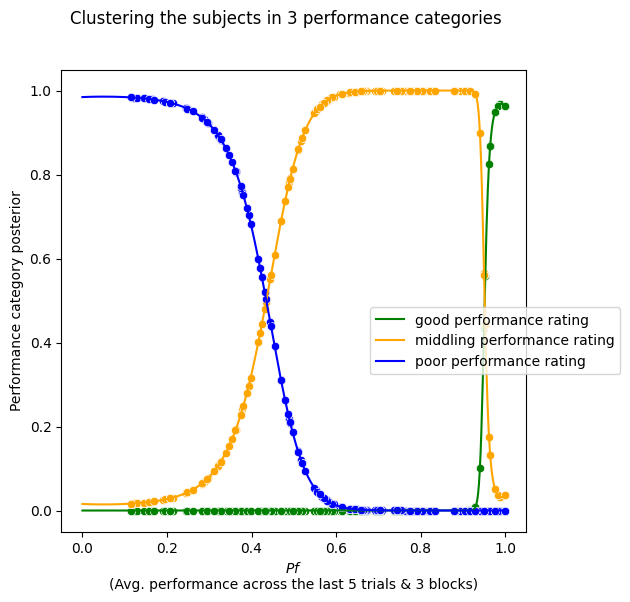

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


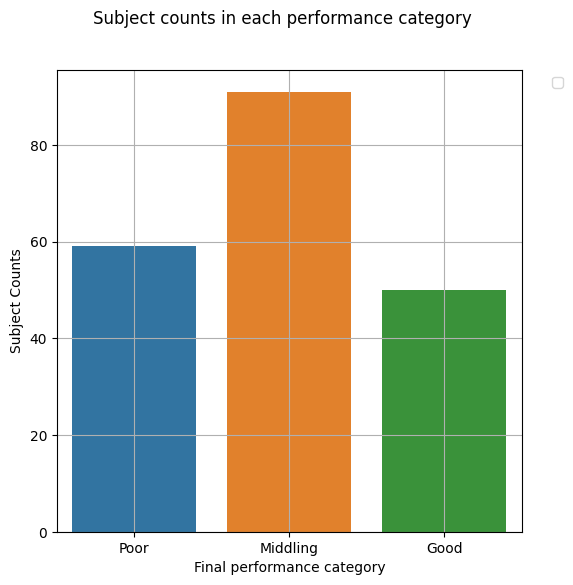

In [1]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","29_01.data")

STUDIES_EXTRACTION_CODES = {
    # "study_1" : {
    #     "dict_code" : "002",
    #     "internal_task_id" : "002",
    #     "studies_id" : None,
    #     "exclude_subjects" : ["5c9cb670b472d0001295f377"],
    #     "feedback_noise_bins" : [0,0.2,0.4,1]
    # },
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 3
subjects_df = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS)

The exploration / exploitation shift is clearly visible in the last category of subjects, with a distinct decrease in the average variation in point position. This is far less visible in less successful subject categories.

Question : for a single action modality, how does the intensity of a variation relate to the variation of the other modalities.

C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["delta_gauges"] = list(dgaug)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[label] = list(dnext_act)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  angle   No. Observations:                 1585
Model:                            GLM   Df Residuals:                     1579
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                         0.87327
Method:                          IRLS   Log-Likelihood:                -2138.6
Date:                Thu, 20 Mar 2025   Deviance:                       1378.9
Time:                        13:14:07   Pearson chi2:                 1.38e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05904
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["delta_gauges"] = list(dgaug)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[label] = list(dnext_act)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

                 Generalized Linear Model Regression Results                  
Dep. Variable:             position_x   No. Observations:                 1585
Model:                            GLM   Df Residuals:                     1579
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                        0.019117
Method:                          IRLS   Log-Likelihood:                 890.05
Date:                Thu, 20 Mar 2025   Deviance:                       30.186
Time:                        13:14:08   Pearson chi2:                     30.2
No. Iterations:                     3   Pseudo R-squ. (CS):           0.007486
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["delta_gauges"] = list(dgaug)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[label] = list(dnext_act)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

                 Generalized Linear Model Regression Results                  
Dep. Variable:             position_y   No. Observations:                 1585
Model:                            GLM   Df Residuals:                     1579
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                        0.017841
Method:                          IRLS   Log-Likelihood:                 944.79
Date:                Thu, 20 Mar 2025   Deviance:                       28.171
Time:                        13:14:08   Pearson chi2:                     28.2
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01280
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["delta_gauges"] = list(dgaug)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[label] = list(dnext_act)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\727900026.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

                 Generalized Linear Model Regression Results                  
Dep. Variable:               distance   No. Observations:                 1585
Model:                            GLM   Df Residuals:                     1579
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                        0.046010
Method:                          IRLS   Log-Likelihood:                 194.01
Date:                Thu, 20 Mar 2025   Deviance:                       72.650
Time:                        13:14:09   Pearson chi2:                     72.6
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001199
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

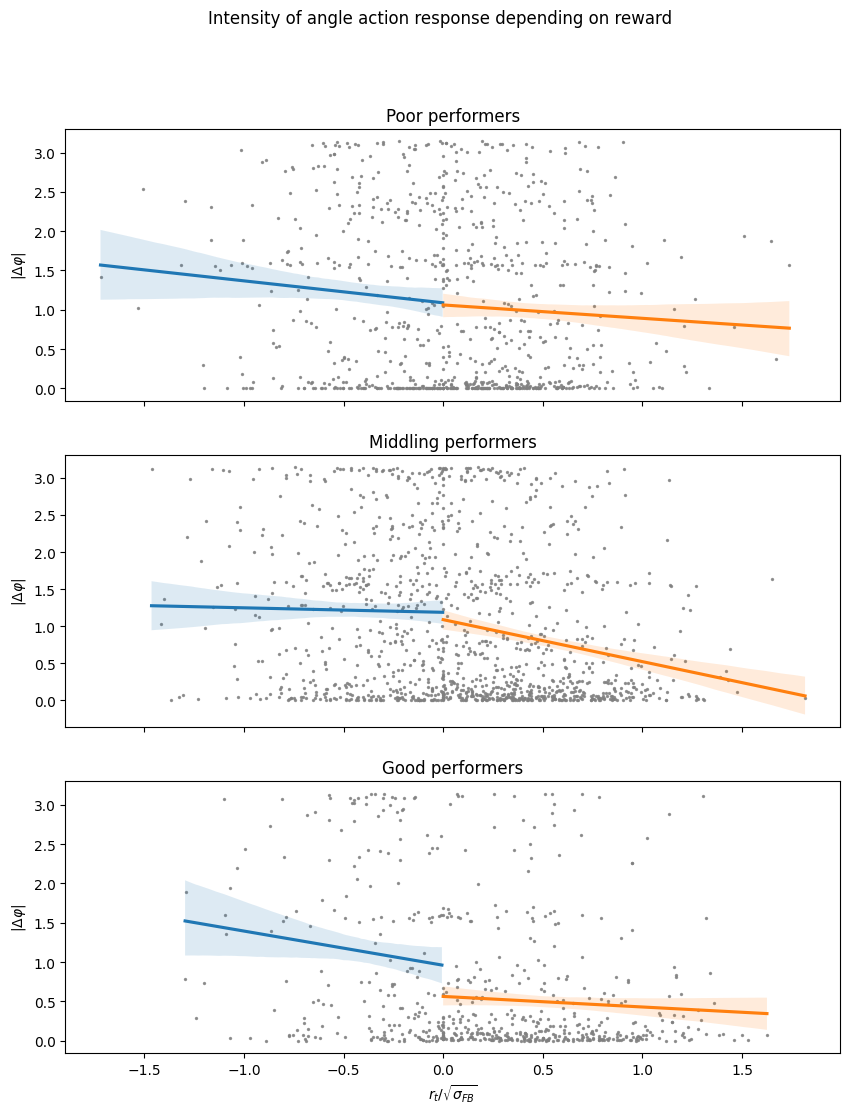

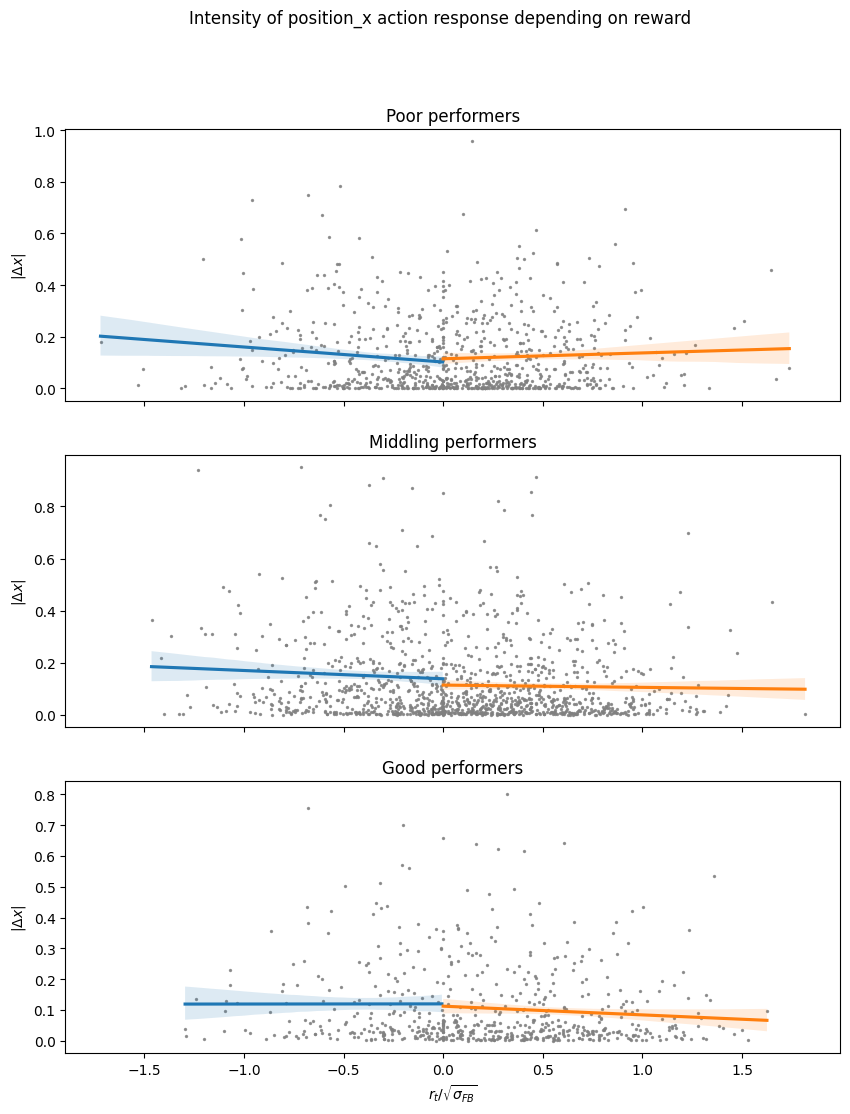

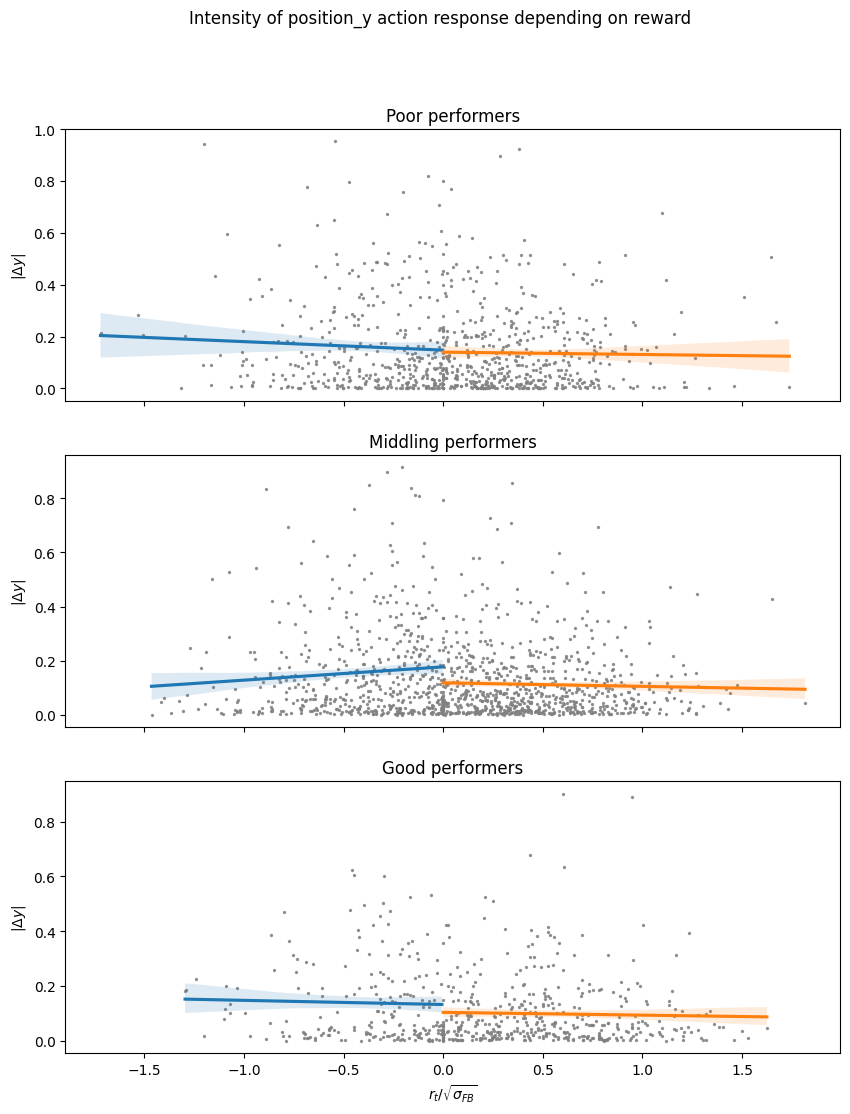

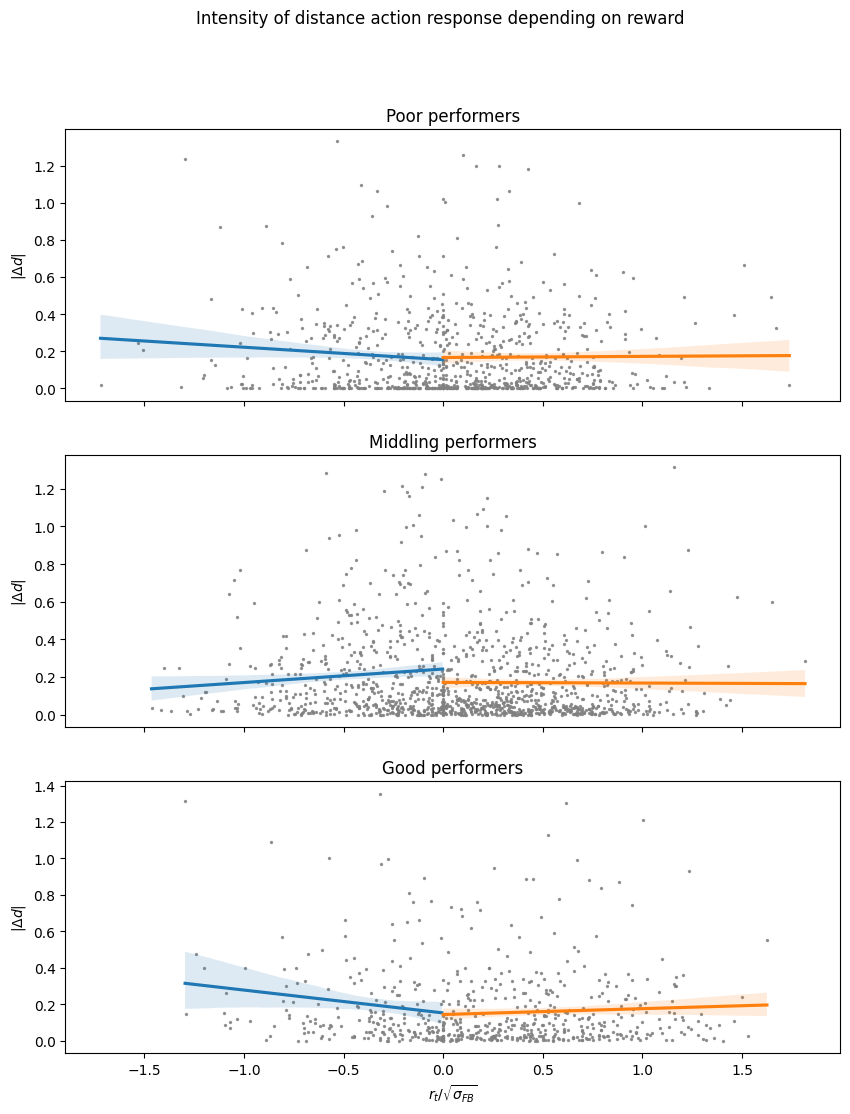

In [59]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 

from scipy import stats
from statsmodels import graphics


copy_df = subjects_df[subjects_df["study_name"]=="study_3"]

plot_normalized_deltas = True


look_between_a = 0
look_between_b = 2


# Difference between raw points at times t and t+1
points = np.stack(copy_df["raw_points"])
Nsubj,Ntrials,Nactions,Npoints,Nfeatures = points.shape

points_1 = points[...,0,:2]
points_2 = points[...,1,:2]
dist_points1 = np.linalg.norm(points_1[:,:,:-1,:] - points_1[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
dist_points2 = np.linalg.norm(points_2[:,:,:-1,:] - points_2[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
avg_dist = (dist_points1 + dist_points2)/2.0
flattened_distance = np.reshape(avg_dist,(Nsubj,-1))


# Observations : 
list_of_subjects_rtf = list(copy_df["realtime_values"])
all_subject_obs = {"gauge_level":[],"delta_gauge":[]}
for _s,_subj_feedback_series in enumerate(list_of_subjects_rtf):                   
    list_of_last_fb = []
    list_of_deltas = []
    for trial_series in _subj_feedback_series:
        trial_last_fbs = []
        trial_delta_fbs = []
        for timestep_series in trial_series:
            initial_feedback_value = timestep_series[0][...,1]
            final_feedback_value = timestep_series[-1][...,1]
            
            # print(timestep_series[0,:])
            
            trial_last_fbs.append(final_feedback_value)
            
            delta_feedback = final_feedback_value - initial_feedback_value
            trial_delta_fbs.append(delta_feedback)
                
        list_of_last_fb.append(trial_last_fbs)
        list_of_deltas.append(trial_delta_fbs)
    
    all_subject_obs["gauge_level" ].append(np.array(list_of_last_fb))
    all_subject_obs["delta_gauge" ].append(np.array(list_of_deltas))

# Action data :
all_barycenters = np.stack(copy_df["action_barycenters"],axis=0)
all_angles = np.stack(copy_df["action_angles"],axis=0)
all_distances = np.stack(copy_df["action_distances"],axis=0)
all_dist_to_center = vmap(vmap(vmap(lambda x : jnp.linalg.norm(x-jnp.array([0.5,0.5])))))(all_barycenters)

# Observation data :
gauge_levels = np.array(all_subject_obs["gauge_level"])
delta_gauges = np.array(all_subject_obs["delta_gauge"])

positive_feedbacks = delta_gauges>=0
negative_feedbacks = delta_gauges<0


# Differences between barycenters at time t and time t+1 :
diff_barycenters = np.linalg.norm(all_barycenters[:,:,1:,:] - all_barycenters[:,:,:-1,:],axis=-1)
# Differences between angles at time t and time t+1 :
diff_angle = all_angles[:,:,1:] - all_angles[:,:,:-1]

# All diff angles > pi are counted as value -2pi
diff_angle[diff_angle>np.pi] += - 2*np.pi
# All diff angles < -pi are counted as value +2pi
diff_angle[diff_angle< -np.pi] += 2*np.pi

# Differences between distances at time t and time t+1 :
diff_distances = all_distances[:,:,1:] - all_distances[:,:,:-1]
Nsubj = diff_barycenters.shape[0]

# Get the actions of interest :
rdiff_angle = np.reshape(diff_angle[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_barycenters = np.reshape(diff_barycenters[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_distances = np.reshape(diff_distances[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_points = np.reshape(avg_dist[:,look_between_a:look_between_b],(Nsubj,-1))

label = 'angle'
modality = all_angles 

for i,(label,modality,latexlabel) in enumerate(zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances],[r"$ \Delta \varphi $",r"$ \Delta x $",r"$ \Delta y $",r"$ \Delta d $"])):
    diff = modality[:,:,1:] - modality[:,:,:-1]  # Difference betweeen successive actions
    dgaug = np.reshape(delta_gauges[...,1:-1][:,look_between_a:look_between_b],(Nsubj,-1))
    if label == 'angle':
            diff[diff>np.pi] += - 2*np.pi
            diff[diff< -np.pi] += 2*np.pi
    dnext_act = np.abs(np.reshape(diff[:,look_between_a:look_between_b],(Nsubj,-1)))
    plot_df = copy_df[["subject_id","final_performance","feedback_noise_std","performance_category"]]
    plot_df["delta_gauges"] = list(dgaug)
    plot_df[label] = list(dnext_act)

    exploded_df = plot_df.explode([label, 'delta_gauges'])

    exploded_df_positive = exploded_df[exploded_df["delta_gauges"]>=0]
    exploded_df_negative = exploded_df[exploded_df["delta_gauges"]<0]

    for edf in [exploded_df_positive,exploded_df_negative]:
        edf["delta_gauges"] = edf["delta_gauges"].astype(float)
        edf['delta_gauges_norm'] = edf['delta_gauges'] / np.sqrt(edf["feedback_noise_std"])
        
        edf[label] = edf[label].astype(float)
        
        
        
    # exploded_df_positive[label] = exploded_df_positive[label].astype(float)
    # exploded_df_positive["delta_gauges"] = exploded_df_positive["delta_gauges"].astype(float)
    # exploded_df_negative[label] = exploded_df_negative[label].astype(float)
    # exploded_df_negative["delta_gauges"] = exploded_df_negative["delta_gauges"].astype(float)


    model = smf.glm(formula=label+' ~ delta_gauges_norm*C(performance_category)', data=exploded_df_positive, family=sm.families.Gaussian())
    result = model.fit()

    print(result.summary())
    print('Parameters  :\n', result.params)
    print('T-values:\n', result.tvalues)



    model = smf.glm(formula=label+' ~ delta_gauges_norm*C(performance_category)', data=exploded_df_negative, family=sm.families.Gaussian())
    result = model.fit()

    print(result.summary())
    print('Parameters  :\n', result.params)
    print('T-values:\n', result.tvalues)


    fig,axs =  plt.subplots(3,1,figsize= (10,12),sharex=True)
    fig.suptitle("Intensity of {} action response depending on reward".format(label))
    for p,perfcat in  enumerate(["Poor","Middling","Good"]):
        ax = axs[p]
        
        ax.set_title("{} performers".format(perfcat))
        
        
        sns.regplot(ax=ax,data = exploded_df_negative[exploded_df_negative["performance_category"]==perfcat],x="delta_gauges_norm",y=label,scatter_kws={"color": "grey", "s": 2})
        sns.regplot(ax=ax,data = exploded_df_positive[exploded_df_positive["performance_category"]==perfcat],x="delta_gauges_norm",y=label,scatter_kws={"color": "grey", "s": 2})
        
        if p == 2:
            ax.set_xlabel("$r_t/\sqrt{\sigma_{FB}}$")
        else :
            ax.set_xlabel("")
        # ax.set_ylabel(r"$| \Delta \varphi|$")
        ax.set_ylabel("|"+ latexlabel + "|")

# fig,axs = plt.subplots(4,3,figsize=(15,20))

# for i,(label,modality,latexlabel) in enumerate(zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances],[r"$ \Delta \varphi $",r"$ \Delta x $",r"$ \Delta y $",r"$ \Delta d $"])):
#     dgaug = np.reshape(delta_gauges[...,1:-1][:,look_between_a:look_between_b],(Nsubj,-1))
#     diff = modality[:,:,1:] - modality[:,:,:-1]  # Difference betweeen successive actions 
    
#     if label == 'angle':
#         # All diff angles > pi are counted as value -2pi
#         diff[diff>np.pi] += - 2*np.pi
#         # All diff angles < -pi are counted as value +2pi
#         diff[diff< -np.pi] += 2*np.pi

    
#     dnext_act = np.abs(np.reshape(diff[:,look_between_a:look_between_b],(Nsubj,-1)))
    
#     plot_df = copy_df[["subject_id","final_performance","feedback_noise_std","performance_category"]]
        
#     plot_df[label] = list(dnext_act)
#     plot_df["delta_gauges"] = list(dgaug)
    
#     plot_df = plot_df[plot_df["performance_category"]=="Poor"]
#     exploded_df = plot_df.explode([label, 'delta_gauges'])
#     exploded_df['delta_gauges_norm'] = exploded_df['delta_gauges'] / np.sqrt(exploded_df["feedback_noise_std"])
    
#     for ax in axs[i,:]:
#         # ax.set_xlim([-10,10])
#         ax.set_ylim([np.min(exploded_df[label]),np.max(exploded_df[label])])
    
#     fbs_noises = [0.025,0.1 ,0.175]
#     for k,fb_std in enumerate(fbs_noises):
#         ax = axs[i,k]
#         if i == 0:
#             ax.set_title(fb_std)
        
        
        
#         ax.axvline(0)
#         ax.axhline(0)
        
        
#         if plot_normalized_deltas : 
#             sns.kdeplot(ax=ax,data = exploded_df[exploded_df['feedback_noise_std']==fb_std],x = "delta_gauges_norm",y=label, cmap='Reds',fill=True)
#         else : 
#             sns.kdeplot(ax=ax,data = exploded_df[exploded_df['feedback_noise_std']==fb_std],x = "delta_gauges",y=label, cmap='Reds',fill=True)
#         if k == 0:
#             ax.set_ylabel("|"+ latexlabel + "|")
#         else : 
#             ax.set_ylabel("")
#         if i == 3 :
#             if plot_normalized_deltas : 
#                 ax.set_xlabel("$r_t / \sqrt{\sigma_{FB}}$")
#             else:
#                 ax.set_xlabel("$r_t$")
#         else : 
#             ax.set_xlabel("")
            
# plt.show()

C:\Users\annic\AppData\Local\Temp\ipykernel_51348\2893754653.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[label] = list(dnext_act)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\2893754653.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["delta_gauges"] = list(dgaug)
C:\Users\annic\AppData\Local\Temp\ipykernel_51348\2893754653.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

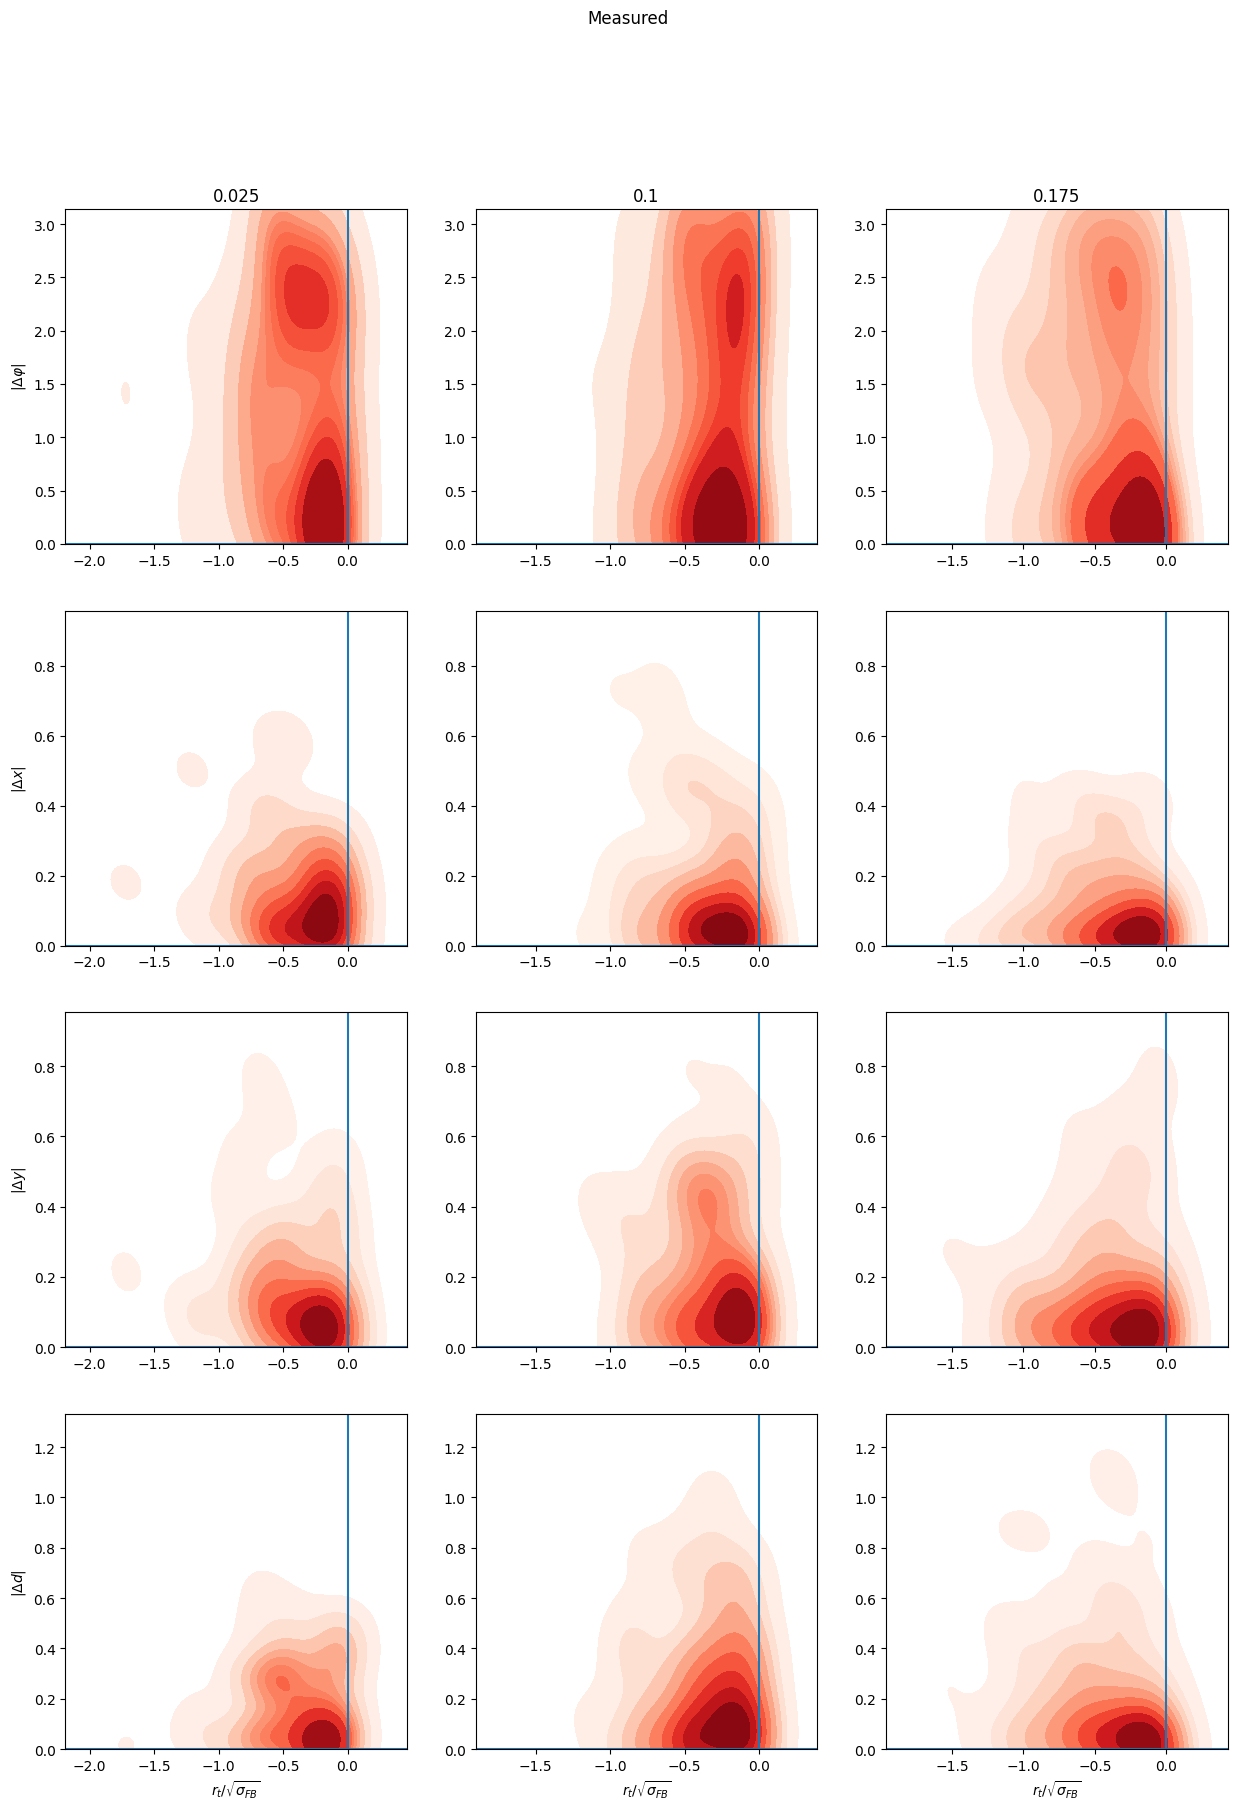

In [7]:
copy_df = subjects_df[subjects_df["study_name"]=="study_3"]

plot_normalized_deltas = True


look_between_a = 0
look_between_b = 2


# Difference between raw points at times t and t+1
points = np.stack(copy_df["raw_points"])
Nsubj,Ntrials,Nactions,Npoints,Nfeatures = points.shape

points_1 = points[...,0,:2]
points_2 = points[...,1,:2]
dist_points1 = np.linalg.norm(points_1[:,:,:-1,:] - points_1[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
dist_points2 = np.linalg.norm(points_2[:,:,:-1,:] - points_2[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
avg_dist = (dist_points1 + dist_points2)/2.0
flattened_distance = np.reshape(avg_dist,(Nsubj,-1))


# Observations : 
list_of_subjects_rtf = list(copy_df["realtime_values"])
all_subject_obs = {"gauge_level":[],"delta_gauge":[]}
for _s,_subj_feedback_series in enumerate(list_of_subjects_rtf):                   
    list_of_last_fb = []
    list_of_deltas = []
    for trial_series in _subj_feedback_series:
        trial_last_fbs = []
        trial_delta_fbs = []
        for timestep_series in trial_series:
            initial_feedback_value = timestep_series[0][...,1]
            final_feedback_value = timestep_series[-1][...,1]
            
            # print(timestep_series[0,:])
            
            trial_last_fbs.append(final_feedback_value)
            
            delta_feedback = final_feedback_value - initial_feedback_value
            trial_delta_fbs.append(delta_feedback)
                
        list_of_last_fb.append(trial_last_fbs)
        list_of_deltas.append(trial_delta_fbs)
    
    all_subject_obs["gauge_level" ].append(np.array(list_of_last_fb))
    all_subject_obs["delta_gauge" ].append(np.array(list_of_deltas))

# Action data :
all_barycenters = np.stack(copy_df["action_barycenters"],axis=0)
all_angles = np.stack(copy_df["action_angles"],axis=0)
all_distances = np.stack(copy_df["action_distances"],axis=0)
all_dist_to_center = vmap(vmap(vmap(lambda x : jnp.linalg.norm(x-jnp.array([0.5,0.5])))))(all_barycenters)

# Observation data :
gauge_levels = np.array(all_subject_obs["gauge_level"])
delta_gauges = np.array(all_subject_obs["delta_gauge"])

positive_feedbacks = delta_gauges>=0
negative_feedbacks = delta_gauges<0


# Differences between barycenters at time t and time t+1 :
diff_barycenters = np.linalg.norm(all_barycenters[:,:,1:,:] - all_barycenters[:,:,:-1,:],axis=-1)
# Differences between angles at time t and time t+1 :
diff_angle = all_angles[:,:,1:] - all_angles[:,:,:-1]

# All diff angles > pi are counted as value -2pi
diff_angle[diff_angle>np.pi] += - 2*np.pi
# All diff angles < -pi are counted as value +2pi
diff_angle[diff_angle< -np.pi] += 2*np.pi

# Differences between distances at time t and time t+1 :
diff_distances = all_distances[:,:,1:] - all_distances[:,:,:-1]
Nsubj = diff_barycenters.shape[0]

# Get the actions of interest :
rdiff_angle = np.reshape(diff_angle[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_barycenters = np.reshape(diff_barycenters[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_distances = np.reshape(diff_distances[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_points = np.reshape(avg_dist[:,look_between_a:look_between_b],(Nsubj,-1))

label = 'angle'
modality = all_angles   

# for label,modality in zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances]):
#     dgaug = np.reshape(delta_gauges[...,:-1][:,look_between_a:look_between_b],(Nsubj,-1))
#     next_act = np.reshape(modality[:,look_between_a:look_between_b],(Nsubj,-1))
#     print(dgaug.shape)
#     print(next_act.shape)
#     plt.scatter(dgaug,next_act,alpha = 0.1)
#     plt.title("Next {} based on feedback received".format(label))
#     plt.xlabel("Feedback received")
#     plt.ylabel("{} action performed".format(label))
#     plt.show()
    
    
fig,axs = plt.subplots(4,3,figsize=(15,20))
fig.suptitle("Measured")
for i,(label,modality,latexlabel) in enumerate(zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances],[r"$ \Delta \varphi $",r"$ \Delta x $",r"$ \Delta y $",r"$ \Delta d $"])):
    dgaug = np.reshape(delta_gauges[...,1:-1][:,look_between_a:look_between_b],(Nsubj,-1))
    diff = modality[:,:,1:] - modality[:,:,:-1]  # Difference betweeen successive actions 
    
    if label == 'angle':
        # All diff angles > pi are counted as value -2pi
        diff[diff>np.pi] += - 2*np.pi
        # All diff angles < -pi are counted as value +2pi
        diff[diff< -np.pi] += 2*np.pi

    
    dnext_act = np.abs(np.reshape(diff[:,look_between_a:look_between_b],(Nsubj,-1)))
    
    plot_df = copy_df[["subject_id","final_performance","feedback_noise_std","performance_category"]]
    plot_df[label] = list(dnext_act)
    plot_df["delta_gauges"] = list(dgaug)
    
    
    plot_df = plot_df[plot_df["performance_category"]=="Poor"]
    exploded_df = plot_df.explode([label, 'delta_gauges'])
    exploded_df['delta_gauges_norm'] = exploded_df['delta_gauges'] / np.sqrt(exploded_df["feedback_noise_std"])
    
    for ax in axs[i,:]:
        ax.set_ylim([np.min(exploded_df[label]),np.max(exploded_df[label])])
    
    fbs_noises = [0.025,0.1 ,0.175]
    for k,fb_std in enumerate(fbs_noises):
        ax = axs[i,k]
        if i == 0:
            ax.set_title(fb_std)
        
        
        
        ax.axvline(0)
        ax.axhline(0)
        
        
        if plot_normalized_deltas : 
            sns.kdeplot(ax=ax,data = exploded_df[(exploded_df['feedback_noise_std']==fb_std)&(exploded_df['delta_gauges']<0)],x = "delta_gauges_norm",y=label, cmap='Reds',fill=True)
        else : 
            sns.kdeplot(ax=ax,data = exploded_df[(exploded_df['feedback_noise_std']==fb_std)&(exploded_df['delta_gauges']<0)],x = "delta_gauges",y=label, cmap='Reds',fill=True)
        if k == 0:
            ax.set_ylabel("|"+ latexlabel + "|")
        else : 
            ax.set_ylabel("")
        if i == 3 :
            if plot_normalized_deltas : 
                ax.set_xlabel("$r_t / \sqrt{\sigma_{FB}}$")
            else:
                ax.set_xlabel("$r_t$")
        else : 
            ax.set_xlabel("")
            
plt.show()

In [ ]:
copy_df = subjects_df[subjects_df["study_name"]=="study_3"]

plot_normalized_deltas = True


look_between_a = 0
look_between_b = 4


# Difference between raw points at times t and t+1
points = np.stack(copy_df["raw_points"])
Nsubj,Ntrials,Nactions,Npoints,Nfeatures = points.shape

points_1 = points[...,0,:2]
points_2 = points[...,1,:2]
dist_points1 = np.linalg.norm(points_1[:,:,:-1,:] - points_1[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
dist_points2 = np.linalg.norm(points_2[:,:,:-1,:] - points_2[:,:,1:,:],axis=-1)[:,look_between_a:look_between_b]
avg_dist = (dist_points1 + dist_points2)/2.0
flattened_distance = np.reshape(avg_dist,(Nsubj,-1))


# Observations : 
list_of_subjects_rtf = list(copy_df["realtime_values"])
all_subject_obs = {"gauge_level":[],"delta_gauge":[]}
for _s,_subj_feedback_series in enumerate(list_of_subjects_rtf):                   
    list_of_last_fb = []
    list_of_deltas = []
    for trial_series in _subj_feedback_series:
        trial_last_fbs = []
        trial_delta_fbs = []
        for timestep_series in trial_series:
            initial_feedback_value = timestep_series[0][...,1]
            final_feedback_value = timestep_series[-1][...,1]
            
            # print(timestep_series[0,:])
            
            trial_last_fbs.append(final_feedback_value)
            
            delta_feedback = final_feedback_value - initial_feedback_value
            trial_delta_fbs.append(delta_feedback)
                
        list_of_last_fb.append(trial_last_fbs)
        list_of_deltas.append(trial_delta_fbs)
    
    all_subject_obs["gauge_level" ].append(np.array(list_of_last_fb))
    all_subject_obs["delta_gauge" ].append(np.array(list_of_deltas))

# Action data :
all_barycenters = np.stack(copy_df["action_barycenters"],axis=0)
all_angles = np.stack(copy_df["action_angles"],axis=0)
all_distances = np.stack(copy_df["action_distances"],axis=0)
all_dist_to_center = vmap(vmap(vmap(lambda x : jnp.linalg.norm(x-jnp.array([0.5,0.5])))))(all_barycenters)

# Observation data :
gauge_levels = np.array(all_subject_obs["gauge_level"])
delta_gauges = np.array(all_subject_obs["delta_gauge"])

positive_feedbacks = delta_gauges>=0
negative_feedbacks = delta_gauges<0


# Differences between barycenters at time t and time t+1 :
diff_barycenters = np.linalg.norm(all_barycenters[:,:,1:,:] - all_barycenters[:,:,:-1,:],axis=-1)
# Differences between angles at time t and time t+1 :
diff_angle = all_angles[:,:,1:] - all_angles[:,:,:-1]

# All diff angles > pi are counted as value -2pi
diff_angle[diff_angle>np.pi] += - 2*np.pi
# All diff angles < -pi are counted as value +2pi
diff_angle[diff_angle< -np.pi] += 2*np.pi

# Differences between distances at time t and time t+1 :
diff_distances = all_distances[:,:,1:] - all_distances[:,:,:-1]
Nsubj = diff_barycenters.shape[0]

# Get the actions of interest :
rdiff_angle = np.reshape(diff_angle[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_barycenters = np.reshape(diff_barycenters[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_distances = np.reshape(diff_distances[:,look_between_a:look_between_b],(Nsubj,-1))
rdiff_points = np.reshape(avg_dist[:,look_between_a:look_between_b],(Nsubj,-1))

label = 'angle'
modality = all_angles   

# for label,modality in zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances]):
#     dgaug = np.reshape(delta_gauges[...,:-1][:,look_between_a:look_between_b],(Nsubj,-1))
#     next_act = np.reshape(modality[:,look_between_a:look_between_b],(Nsubj,-1))
#     print(dgaug.shape)
#     print(next_act.shape)
#     plt.scatter(dgaug,next_act,alpha = 0.1)
#     plt.title("Next {} based on feedback received".format(label))
#     plt.xlabel("Feedback received")
#     plt.ylabel("{} action performed".format(label))
#     plt.show()
    
    
fig,axs = plt.subplots(4,3,figsize=(15,20))

for i,(label,modality,latexlabel) in enumerate(zip(["angle","position_x","position_y","distance"],[all_angles,all_barycenters[...,0],all_barycenters[...,1],all_distances],[r"$ \Delta \varphi $",r"$ \Delta x $",r"$ \Delta y $",r"$ \Delta d $"])):
    dgaug = np.reshape(delta_gauges[...,1:-1][:,look_between_a:look_between_b],(Nsubj,-1))
    diff = modality[:,:,1:] - modality[:,:,:-1]  # Difference betweeen successive actions 
    
    if label == 'angle':
        # All diff angles > pi are counted as value -2pi
        diff[diff>np.pi] += - 2*np.pi
        # All diff angles < -pi are counted as value +2pi
        diff[diff< -np.pi] += 2*np.pi

    
    dnext_act = np.reshape(diff[:,look_between_a:look_between_b],(Nsubj,-1))
    
    plot_df = copy_df[["subject_id","final_performance","feedback_noise_std","performance_category"]]
    plot_df[label] = list(dnext_act)
    plot_df["delta_gauges"] = list(dgaug)
    exploded_df = plot_df.explode([label, 'delta_gauges'])
    exploded_df['delta_gauges_norm'] = exploded_df['delta_gauges'] / np.sqrt(exploded_df["feedback_noise_std"])
    
    for ax in axs[i,:]:
        # ax.set_xlim([-0.5,0.5])
        ax.set_ylim([np.min(exploded_df[label]),np.max(exploded_df[label])])
    
    final_perf_cats = ["Poor","Middling","Good"]
    for k,perfcat in enumerate(final_perf_cats):
        ax = axs[i,k]
        if i == 0:
            ax.set_title(perfcat)
        
        
        
        ax.axvline(0)
        ax.axhline(0)
        
        
        if plot_normalized_deltas : 
            sns.kdeplot(ax=ax,data = exploded_df[exploded_df['performance_category']==perfcat],x = "delta_gauges_norm",y=label, cmap='Reds',fill=True)
        else : 
            sns.kdeplot(ax=ax,data = exploded_df[exploded_df['performance_category']==perfcat],x = "delta_gauges",y=label, cmap='Reds',fill=True)
        if k == 0:
            ax.set_ylabel(latexlabel)
        else : 
            ax.set_ylabel("")
        if i == 3 :
            if plot_normalized_deltas : 
                ax.set_xlabel("$r_t / \sigma_{FB}$")
            else:
                ax.set_xlabel("$r_t$")
        else : 
            ax.set_xlabel("")
            
plt.show()
